# Retirement Planner

---

## Environment Setup

In [1]:
# Import libraries and dependencies
# 99.99% of answers came from solved refresher notebooks from Instructor GS, advice from Instructor AN, advice from Instructor KS, and Tutor, Ms. LT

import numpy as np
import math
import pandas as pd
import os
import pylab
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [2]:
# Set the random seed for resutls reproducibility (for testing purposes only)
np.random.seed(42)

---

## Portfolio Planner

In this activity, you will use the Alpaca API to grab historical data for a `60/40` portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [57]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
#alpaca_api_key = os.getenv("ALPACA_API_KEY")
#alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca_api_key = "PKA4FSD8ECTW4TE97KX2"
alpaca_secret_key = "TDclLTgnFTok2siycgtM4NxGK8zt4S4OLdrI4kNY"

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [58]:
# Get all Assets
assets = api.list_assets()

# Keep only tradeable assets
tradeable = [asset for asset in assets if asset.tradable ]
tradeable

[Asset({   'class': 'us_equity',
     'easy_to_borrow': True,
     'exchange': 'NYSE',
     'id': '02cce5c0-43dc-4e6b-aa5c-f2ece886b01b',
     'marginable': True,
     'name': 'A.H. Belo Corporation',
     'shortable': True,
     'status': 'active',
     'symbol': 'AHC',
     'tradable': True}),
 Asset({   'class': 'us_equity',
     'easy_to_borrow': True,
     'exchange': 'NYSE',
     'id': '1f688063-e2c7-463c-9cf5-ae9124bc4326',
     'marginable': True,
     'name': 'Armada Hoffler Properties, Inc.',
     'shortable': True,
     'status': 'active',
     'symbol': 'AHH',
     'tradable': True}),
 Asset({   'class': 'us_equity',
     'easy_to_borrow': True,
     'exchange': 'NASDAQ',
     'id': '31bfe225-ad5c-47ee-b60b-475a321ff98d',
     'marginable': True,
     'name': 'Albireo Pharma, Inc. Common Stock',
     'shortable': True,
     'status': 'active',
     'symbol': 'ALBO',
     'tradable': True}),
 Asset({   'class': 'us_equity',
     'easy_to_borrow': False,
     'exchange': 'NAS

In [59]:
# Create a new empty DataFrame
asset_info_df = pd.DataFrame()
asset_info_df['symbol'] = pd.Series([asset.symbol for asset in assets])

# Display the first 10 asset tickers
display(asset_info_df.head(10))

symbol
0    AHC
1    AHH
2   ALBO
3   ALXO
4     AN
5   ARMK
6   ATIF
7     BB
8    BMA
9    BNS

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [60]:
# Subset your tickers, then pull returns data:
# Set the ticker
ticker = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago. use corrrect dayes
start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2019-12-31', tz='America/New_York').isoformat()

# Get 1 year's worth of historical data for SPY and AGG
df = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

# Drop unnecessary columns
df = df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

In [61]:
# Display sample data
df.head()

#was simulated_price_df.head()

AGG     SPY
                             close   close
time                                      
2019-01-02 00:00:00-05:00  106.585  249.89
2019-01-03 00:00:00-05:00  107.020  244.46
2019-01-04 00:00:00-05:00  106.695  252.41
2019-01-07 00:00:00-05:00  106.470  254.40
2019-01-08 00:00:00-05:00  106.420  256.65

In [62]:
daily_returns = df.pct_change()
daily_returns.head()

AGG       SPY
                              close     close
time                                         
2019-01-02 00:00:00-05:00       NaN       NaN
2019-01-03 00:00:00-05:00  0.004081 -0.021730
2019-01-04 00:00:00-05:00 -0.003037  0.032521
2019-01-07 00:00:00-05:00 -0.002109  0.007884
2019-01-08 00:00:00-05:00 -0.000470  0.008844

In [63]:

avg_daily_return_agg = daily_returns.mean()['AGG']['close']
avg_daily_return_spy = daily_returns.mean()['SPY']['close']
avg_daily_return_agg

avg_daily_return_spy

0.0010401250682146959

---

## Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:

1. Calculate the daily returns for the SPY and AGG closing prices.

2. Calculate volatility for both the SPY and AGG closing prices.

3. Find the last day's closing price for both stocks and save those as variables

4. Run a Monte Carlo Simulation of at least `100` iterations and generate at least `30` years of closing prices

**Hint:** There are `252` trading days per year, so the number of records to generate for each Monte Carlo run will be `252 days * 30 years`.

In [64]:
# Calculate the daily roi for the stocks
daily_roi = df.pct_change()

#daily_returns = sp_500_set.pct_change()


# Display sample data
# daily_roi.sample()

In [65]:
daily_roi.head()
# algo_returns_set.dropna(inplace=True)
#daily_roi.dropna(inplace=True)

AGG       SPY
                              close     close
time                                         
2019-01-02 00:00:00-05:00       NaN       NaN
2019-01-03 00:00:00-05:00  0.004081 -0.021730
2019-01-04 00:00:00-05:00 -0.003037  0.032521
2019-01-07 00:00:00-05:00 -0.002109  0.007884
2019-01-08 00:00:00-05:00 -0.000470  0.008844

In [66]:
daily_roi.dropna(inplace=True)

In [67]:
daily_roi.head()

AGG       SPY
                              close     close
time                                         
2019-01-03 00:00:00-05:00  0.004081 -0.021730
2019-01-04 00:00:00-05:00 -0.003037  0.032521
2019-01-07 00:00:00-05:00 -0.002109  0.007884
2019-01-08 00:00:00-05:00 -0.000470  0.008844
2019-01-09 00:00:00-05:00  0.000564  0.004130

In [68]:
#std_dev_daily_return_jnj = daily_returns.std()['JNJ']['close']
#std_dev_daily_return_mu = daily_returns.std()['MU']['close']
#std_dev_daily_return_mu
#avg_daily_return_jnj = daily_returns.mean()['JNJ']['close']
#avg_daily_return_mu = daily_returns.mean()['MU']['close']
#avg_daily_return_mu

avg_daily_agg = daily_roi.mean()["AGG"]['close']
avg_daily_spy = daily_roi.mean()["SPY"]['close']

In [69]:
std_daily_agg = daily_roi.std()['AGG']['close']
std_daily_spy = daily_roi.std()['SPY']['close']
std_daily_spy
std_daily_agg
#stated that this is the volatitly instead

0.002089826211646555

In [70]:
# Compute daily volatility
# how do I do this? 
# daily volatility is the square root of the variance
# from https://www.wallstreetmojo.com/volatility-formula/#:~:text=The%20formula%20for%20daily%20volatility,of%20a%20daily%20stock%20price.&text=Further%2C%20the%20annualized%20volatility%20formula,a%20square%20root%20of%20252.

#berkshire_covariance = combination_frame["BERKSHIRE HATHAWAY INC"].cov(combination_frame["S&P"])
#berkshire_variance = combination_frame["S&P"].var()
#berkshire_beta = berkshire_covariance/berkshire_variance
#print(berkshire_covariance)
#print(berkshire_variance)
#berkshire_beta


variance_AGG = daily_roi["AGG"].var()
variance_SPY = daily_roi["SPY"].var()
vol_AGG = math.sqrt(variance_AGG)
vol_SPY = math.sqrt(variance_SPY)
print(vol_AGG)
print(vol_SPY)

0.002089826211646555
0.007820053413439366


In [71]:
# Save the last day's closing price
#jnj_last_price = df['JNJ']['close'][-1]
# mu_last_price = df['MU']['close'][-1]
last_price_AGG = df['AGG']['close'][-1]
last_price_SPY = df['SPY']['close'][-1]

In [72]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
last_price_AGG = df['AGG']['close'][-1]
last_price_SPY = df['SPY']['close'][-1]



monte_carlo = pd.DataFrame()

In [73]:
simulated_price_df = pd.DataFrame()
portfol_cumul_ret = pd.DataFrame()

In [74]:
# Run the Monte Carlo Simulation

# Set number of simulations and coin flips
#num_simulations = 5
#num_flips = 10

# Set a list object acting as a coin: heads or tails
#coin = ["heads", "tails"]

# Set probability of events
#probability = [0.5, 0.5]

# Create an empty DataFrame to hold simulation results
#monte_carlo = pd.DataFrame()
#avg_daily_agg = daily_roi.mean()["AGG"]['close']
# std_daily_agg = daily_roi.std()['AGG']['close']


for item in range(number_simulations):
    simulated_agg_prices = [last_price_AGG]
    simulated_spy_prices = [last_price_SPY]
    for neweritem in range(number_records):
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_agg, std_daily_agg))
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_spy, std_daily_spy))
        simulated_agg_prices.append(simulated_agg_price)
        simulated_spy_prices.append(simulated_spy_price)

    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    #simulated_price_df["MU prices"] = pd.Series(simulated_mu_prices)
    
    simulated_daily_returns = simulated_price_df.pct_change()
    weights = [.6, .4]
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    portfol_cumul_ret[item] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

portfol_cumul_ret.head()
    
    
     # Calculate the daily returns of simulated prices
  #  simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% JNJ; 40% MU)
 #   weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
 #   portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
 #   portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
# portfolio_cumulative_returns.head()


0         1         2         3         4         5         6    \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  1.000734  0.999711  0.998236  1.003406  1.008394  0.997499  0.999665   
2  1.006858  1.002967  1.001193  0.997723  1.007479  0.996020  0.996899   
3  1.006373  1.002684  1.001855  0.997833  1.006230  0.992281  1.000065   
4  1.011329  1.004633  1.004337  1.001541  1.010243  0.993665  1.003103   

        7         8         9    ...       490       491       492       493  \
0  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1  1.007942  1.000837  0.996925  ...  1.001651  0.994702  1.002253  1.001714   
2  1.002468  1.000314  0.996706  ...  1.004336  0.996975  1.003699  1.004215   
3  0.997843  1.000294  1.003231  ...  1.004999  0.993502  1.004924  1.007249   
4  0.993689  1.002660  1.004777  ...  1.003653  0.995611  1.005109  1.004129   

        494       495       496       497       498       499  
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1  0.997404  1.002494  1.000483  1.003431  0.999305  0.996260  
2  0.998267  0.994751  1.001137  1.002624  0.998000  0.999466  
3  0.994609  0.996293  1.005230  0.999495  1.000131  1.002152  
4  0.996546  0.995422  1.002760  1.001598  0.999741  1.003183  

[5 rows x 500 columns]

In [75]:
riskier_simulated_price_df = pd.DataFrame()
riskier_portfol_cumul_ret = pd.DataFrame()

In [76]:
# simulating with more risk, weights are .9 for stocks and .1 for bonds
for riskier_item in range(number_simulations):
    riskier_simulated_agg_prices = [last_price_AGG]
    riskier_simulated_spy_prices = [last_price_SPY]
    for riskier_neweritem in range(number_records):
        riskier_simulated_agg_price = riskier_simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_agg, std_daily_agg))
        riskier_simulated_spy_price = riskier_simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_spy, std_daily_spy))
        riskier_simulated_agg_prices.append(simulated_agg_price)
        riskier_simulated_spy_prices.append(simulated_spy_price)

    simulated_price_df["AGG prices"] = pd.Series(riskier_simulated_agg_prices)
    simulated_price_df["SPY prices"] = pd.Series(riskier_simulated_spy_prices)
    #simulated_price_df["MU prices"] = pd.Series(simulated_mu_prices)
    
    riskier_simulated_daily_returns = riskier_simulated_price_df.pct_change()
    riskier_weights = [.9, .1]
    riskier_portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    riskier_portfol_cumul_ret[item] = (1 + riskier_portfolio_daily_returns.fillna(0)).cumprod()

riskier_portfol_cumul_ret.head()
    

499
0  1.000000
1  0.996260
2  0.999466
3  1.002152
4  1.003183

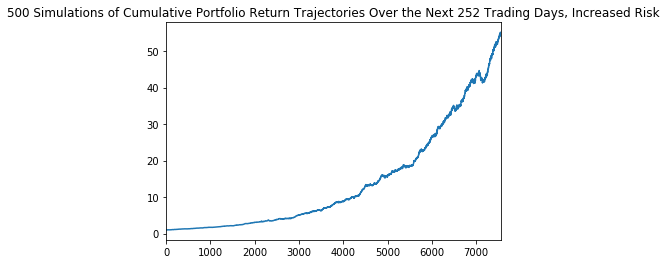

In [77]:
plot_title = f"{riskier_item + 1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days, Increased Risk"
riskier_portfol_cumul_ret.plot(legend=None, title=plot_title)

In [78]:

"""

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):

    # Initialize the simulated prices list with the last closing price of `JNJ` and `MU`
    simulated_jnj_prices = [jnj_last_price]
    simulated_mu_prices = [mu_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_trading_days):
        
        # Calculate the simulated price using the last price within the list
        simulated_jnj_price = simulated_jnj_prices[-1] * (1 + np.random.normal(avg_daily_return_jnj, std_dev_daily_return_jnj))
        simulated_mu_price = simulated_mu_prices[-1] * (1 + np.random.normal(avg_daily_return_mu, std_dev_daily_return_mu))
        
        # Append the simulated price to the list
        simulated_jnj_prices.append(simulated_jnj_price)
        simulated_mu_prices.append(simulated_mu_price)
    
    # Append the simulated prices of each simulation to DataFrame
    simulated_price_df["JNJ prices"] = pd.Series(simulated_jnj_prices)
    simulated_price_df["MU prices"] = pd.Series(simulated_mu_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% JNJ; 40% MU)
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()









"""

'\n\n# Initialize empty DataFrame to hold simulated prices for each simulation\nsimulated_price_df = pd.DataFrame()\nportfolio_cumulative_returns = pd.DataFrame()\n\n# Run the simulation of projecting stock prices for the next trading year, `1000` times\nfor n in range(num_simulations):\n\n    # Initialize the simulated prices list with the last closing price of `JNJ` and `MU`\n    simulated_jnj_prices = [jnj_last_price]\n    simulated_mu_prices = [mu_last_price]\n    \n    # Simulate the returns for 252 days\n    for i in range(num_trading_days):\n        \n        # Calculate the simulated price using the last price within the list\n        simulated_jnj_price = simulated_jnj_prices[-1] * (1 + np.random.normal(avg_daily_return_jnj, std_dev_daily_return_jnj))\n        simulated_mu_price = simulated_mu_prices[-1] * (1 + np.random.normal(avg_daily_return_mu, std_dev_daily_return_mu))\n        \n        # Append the simulated price to the list\n        simulated_jnj_prices.append(simulat

In [79]:
# Check that the simulation ran successfully
# just put .head

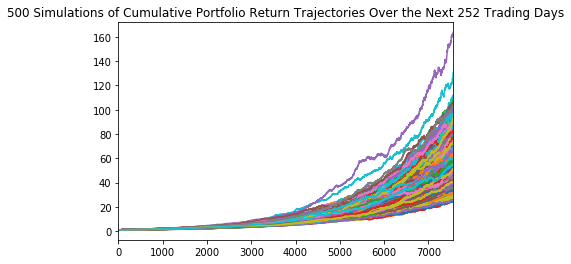

In [80]:
# Visualize the Simulation
plot_title = f"{item + 1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days"
portfol_cumul_ret.plot(legend=None, title=plot_title)

In [81]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_cumulative_returns = portfol_cumul_ret.iloc[-1, :]
ending_cumulative_returns.head()

0    59.171007
1    53.378151
2    57.295425
3    49.200255
4    56.382877
Name: 7560, dtype: float64

In [82]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
final_cumul_ret = portfol_cumul_ret.iloc[-1, :] 
final_cumul_ret.head() 

0    59.171007
1    53.378151
2    57.295425
3    49.200255
4    56.382877
Name: 7560, dtype: float64

In [83]:
# Display the 90% confidence interval for the ending returns
confidence_interval = final_cumul_ret.quantile(q=[0.05, 0.95])
confidence_interval

0.05    37.132139
0.95    90.969353
Name: 7560, dtype: float64

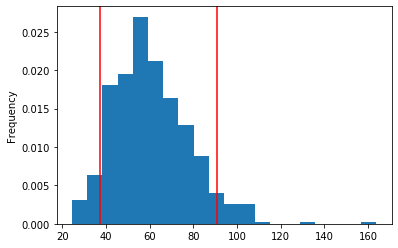

In [84]:
# Visualize the distribution of the ending returns
plt.figure()
final_cumul_ret.plot(kind='hist', density=True, bins=20)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [85]:
# Increased risk with weights set to [.9, .1]

In [86]:
riskier_simulated_price_df = pd.DataFrame()
riskier_portfol_cumul_ret = pd.DataFrame()

In [87]:
# simulating with more risk, weights are .9 for stocks and .1 for bonds
for riskier_item in range(number_simulations):
    riskier_simulated_agg_prices = [last_price_AGG]
    riskier_simulated_spy_prices = [last_price_SPY]
    for riskier_neweritem in range(number_records):
        riskier_simulated_agg_price = riskier_simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_agg, std_daily_agg))
        riskier_simulated_spy_price = riskier_simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_spy, std_daily_spy))
        riskier_simulated_agg_prices.append(simulated_agg_price)
        riskier_simulated_spy_prices.append(simulated_spy_price)

    simulated_price_df["AGG prices"] = pd.Series(riskier_simulated_agg_prices)
    simulated_price_df["SPY prices"] = pd.Series(riskier_simulated_spy_prices)
    #simulated_price_df["MU prices"] = pd.Series(simulated_mu_prices)
    
    riskier_simulated_daily_returns = riskier_simulated_price_df.pct_change()
    riskier_weights = [.9, .1]
    riskier_portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    riskier_portfol_cumul_ret[item] = (1 + riskier_portfolio_daily_returns.fillna(0)).cumprod()

riskier_portfol_cumul_ret.head()
    

499
0  1.000000
1  0.996260
2  0.999466
3  1.002152
4  1.003183

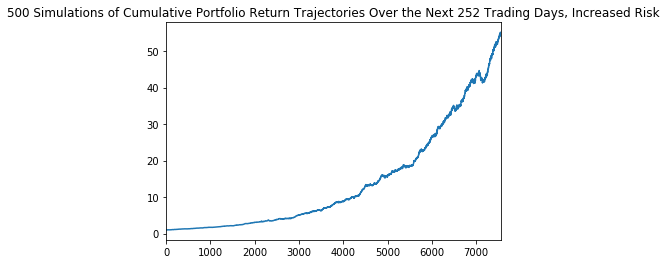

In [88]:
plot_title = f"{riskier_item + 1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days, Increased Risk"
riskier_portfol_cumul_ret.plot(legend=None, title=plot_title)

---

## Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at `30` years for the `10th`, `50th`, and `90th` percentiles?

2. Given an initial investment of `$20,000`, what is the expected return in dollars at the `10th`, `50th`, and `90th` percentiles?

3. Given the current projected annual income from the Plaid analysis, will a `4%` withdrawal rate meet or exceed that value at the `10th` percentile? Note: This is basically determining if retirement income is equivalent to current income.

4. How would a `50%` increase in the initial investment amount affect the `4%` retirement withdrawal? In other words, what happens if the initial investment had been bigger?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [89]:
# Compute cumulative returns
final_cumul_ret_90 = final_cumul_ret.quantile(.9)
print(f" Expected cumulative returns in thirty years for the ninetieth percentile is $" "{:.2f}".format (final_cumul_ret_90))
final_cumul_ret_50 = final_cumul_ret.quantile(.5)
print(f" Expected cumulative returns in thirty years for the fiftieth percentile is $" "{:.2f}".format (final_cumul_ret_50))
final_cumul_ret_10 = final_cumul_ret.quantile(.1)
print(f" Expected cumulative returns in thirty years for the tenth percentile is $" "{:.2f}".format (final_cumul_ret_10))


 Expected cumulative returns in thirty years for the ninetieth percentile is $82.99
 Expected cumulative returns in thirty years for the fiftieth percentile is $58.91
 Expected cumulative returns in thirty years for the tenth percentile is $40.19


In [90]:
# final_cumul_ret.quantile([.9, .5, .1]) alternate form from Tutor, Ms. LT

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [91]:
# Set initial investment
initializer = 20000

# Compute expected portfolio return
returner_90 = initializer * final_cumul_ret_90
print(f"Expected cumulative returns of twenty thousand dollars for ninetieth percentile is $" "{:.2f}".format(returner_90))

returner_50 = initializer * final_cumul_ret_50
print(f"Expected cumulative returns of twenty thousand dollars for fiftieth percentile is $" "{:.2f}".format(returner_50))


returner_10 = initializer * final_cumul_ret_10
print(f"Expected cumulative returns of twenty thousand dollars for tenth percentile is $" "{:.2f}".format(returner_10))

Expected cumulative returns of twenty thousand dollars for ninetieth percentile is $1659792.34
Expected cumulative returns of twenty thousand dollars for fiftieth percentile is $1178194.04
Expected cumulative returns of twenty thousand dollars for tenth percentile is $803858.74


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [92]:
# Set Plaid's projected income
plaid_projected_income = 6085
# The 6085 value is from the account exercise (account_holder file).
plaid_initial = 20000
# Calculate the 4% withdrawal for the ending return as retirement income
#four_percent_income = .04*(plaid_projected_income*final_cumul_ret_10)
#four_percent_income = .04*
#print(f" Returment income Is $" "{: .2f} ".format (four_percent_income) )
# Determine if the retirement income meets or exceeds the current projected income
#print(f" Retirement income is higher than the current projected income")

In [93]:
retirement_income_from_initial = .04 * (plaid_initial*final_cumul_ret_10) # from Ms. LT, Tutor
retirement_income_from_initial

32154.34952678274

In [94]:
#The value of retirement_income_from_initial is greater than plaid_projected_income of 6085.


In [95]:
retirement_income_from_projected = .04 * (plaid_projected_income*final_cumul_ret_10) # from Ms. LT, Tutor
retirement_income_from_projected

9782.960843523648

In [96]:
#The value of retirement_income_from_projected is greater than plaid_projected_income of 6085.

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [97]:
# Cells in this section address the challenge of exploring the increase of the initial investment.
# Increases in the initial investment lead to a substantially greater income.
# These increases were examined for each of the three selected percentiles.

In [98]:
# Re-calculate the retirement income with a 50% increase in the initial investment amount
investment_augmentation = plaid_initial * 1.5
return_augmentation_90 = .04*investment_augmentation*final_cumul_ret_90
print(f" Retirement Income with a fifty percent increase in the initial investment for the ninetieth percentile is $" "{:.2f}".format (return_augmentation_90))



 Retirement Income with a fifty percent increase in the initial investment for the ninetieth percentile is $99587.54


In [99]:
double_augmentation = plaid_initial * 2
double_augmentation_90 = .04*double_augmentation*final_cumul_ret_90
print(f" Retirement Income with a double of the initial investment for the ninetieth percentile is $" "{:.2f}".format (double_augmentation_90))



 Retirement Income with a double of the initial investment for the ninetieth percentile is $132783.39


In [100]:
triple_aug = plaid_initial * 3
triple_aug_90 = .04*triple_aug*final_cumul_ret_90
print(f" Retirement Income with a triple of the initial investment for the ninetieth percentile is $" "{:.2f}".format (triple_aug_90))


 Retirement Income with a triple of the initial investment for the ninetieth percentile is $199175.08


In [101]:
return_augmentation_50 = .04*investment_augmentation*final_cumul_ret_50
print(f" Retirement Income with a fifty percent increase the initial investment for the fiftieth percentile is $" "{:.2f}".format (return_augmentation_50))


 Retirement Income with a fifty percent increase the initial investment for the fiftieth percentile is $70691.64


In [102]:
double_augmentation = plaid_initial * 2
double_augmentation_50 = .04*double_augmentation*final_cumul_ret_50
print(f" Retirement Income with a double of the initial investment for the fiftieth percentile is $" "{:.2f}".format (double_augmentation_90))



 Retirement Income with a double of the initial investment for the fiftieth percentile is $132783.39


In [103]:
triple_aug = plaid_initial * 3
triple_aug_50 = .04*triple_aug*final_cumul_ret_50
print(f" Retirement Income with a triple of the initial investment for the fiftieth percentile is $" "{:.2f}".format (triple_aug_50))


 Retirement Income with a triple of the initial investment for the fiftieth percentile is $141383.28


In [104]:
return_augmentation_10 = .04*investment_augmentation*final_cumul_ret_10
print(f" Retirement Income with a fifty percent increase in the initial investment for the tenth percentile is $" "{:.2f}".format (return_augmentation_10))

 Retirement Income with a fifty percent increase in the initial investment for the tenth percentile is $48231.52


In [105]:
double_augmentation_10 = .04*double_augmentation*final_cumul_ret_10
print(f" Retirement Income with a double of the initial investment for the tenth percentile is $" "{:.2f}".format (double_augmentation_10))

 Retirement Income with a double of the initial investment for the tenth percentile is $64308.70


In [106]:
triple_aug = plaid_initial * 3
triple_aug_10 = .04*triple_aug*final_cumul_ret_10
print(f" Retirement Income with a triple of the initial investment for the tenth percentile is $" "{:.2f}".format (triple_aug_10))


 Retirement Income with a triple of the initial investment for the tenth percentile is $96463.05


### Optional Challenge

Use the Monte Carlo data and calculate the cumulative returns at the `5%`, `50%`, and `95%` quartiles and plot this data as a line chart to see how the cumulative returns change over the life of the investment.

In this section, you need to calculate and plot the cumulative returns for the median and `90%` confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [107]:
# Compute projected returns
final_cumul_ret_90 = final_cumul_ret.quantile(.95)
print(f" Expected cumulative returns in thirty years for the ninety-fifth percentile is $" "{:.2f}".format (final_cumul_ret_90))
final_cumul_ret_50 = final_cumul_ret.quantile(.5)
print(f" Expected cumulative returns in thirty years for the fiftieth percentile is $" "{:.2f}".format (final_cumul_ret_50))
final_cumul_ret_10 = final_cumul_ret.quantile(.05)
print(f" Expected cumulative returns in thirty years for the fifth percentile is $" "{:.2f}".format (final_cumul_ret_10))
# Display sample data


 Expected cumulative returns in thirty years for the ninety-fifth percentile is $90.97
 Expected cumulative returns in thirty years for the fiftieth percentile is $58.91
 Expected cumulative returns in thirty years for the fifth percentile is $37.13


0.9        0.5        0.1
0      1.000000   1.000000   1.000000
1      1.005063   1.000692   0.996187
2      1.007480   1.001125   0.995075
3      1.009499   1.001942   0.994502
4      1.011606   1.002221   0.994246
5      1.013032   1.002761   0.993142
6      1.014179   1.003723   0.993045
7      1.015054   1.004231   0.992516
8      1.016847   1.004593   0.992405
9      1.017904   1.005174   0.991593
10     1.019764   1.006056   0.991925
11     1.020352   1.006359   0.991938
12     1.021893   1.007216   0.991630
13     1.023293   1.007141   0.991956
14     1.024102   1.008216   0.991782
15     1.024990   1.008539   0.991926
16     1.025699   1.008751   0.991127
17     1.026421   1.009747   0.991510
18     1.028174   1.010278   0.991546
19     1.030428   1.010394   0.992509
20     1.030466   1.010312   0.993238
21     1.031115   1.010696   0.993232
22     1.032040   1.011512   0.993454
23     1.032749   1.011650   0.992920
24     1.035191   1.012283   0.993595
25     1.035815   1.012854   0.992602
26     1.035937   1.013814   0.992198
27     1.036213   1.014047   0.991014
28     1.038215   1.015025   0.992813
29     1.038592   1.014965   0.992764
...         ...        ...        ...
7531  81.373106  58.164411  39.749614
7532  81.274670  58.090765  39.759136
7533  81.265672  58.112661  39.796707
7534  81.570267  58.201335  39.827451
7535  81.369992  58.139917  39.719050
7536  81.548746  58.266418  39.689283
7537  81.530183  58.163920  39.761381
7538  81.698803  58.102994  39.821284
7539  81.696153  58.338709  39.849516
7540  81.919875  58.486743  39.714709
7541  81.921506  58.491416  39.720888
7542  81.723499  58.529862  39.818762
7543  81.699531  58.421003  39.754027
7544  81.590865  58.523978  39.768736
7545  81.690041  58.498347  39.885818
7546  81.934861  58.499941  39.935901
7547  81.964227  58.589850  39.855119
7548  81.817186  58.587404  40.009396
7549  81.838339  58.587122  40.077044
7550  81.961083  58.591290  39.891457
7551  82.038151  58.621338  39.847052
7552  82.282701  58.576439  39.764835
7553  82.285074  58.743315  39.780773
7554  82.405451  58.777850  39.824309
7555  82.346885  58.910629  39.962940
7556  82.328998  58.792119  40.050519
7557  82.540360  58.915562  40.029641
7558  82.388573  58.863693  40.086856
7559  82.936370  58.823918  40.088290
7560  82.989617  58.909702  40.192937

[7561 rows x 3 columns]

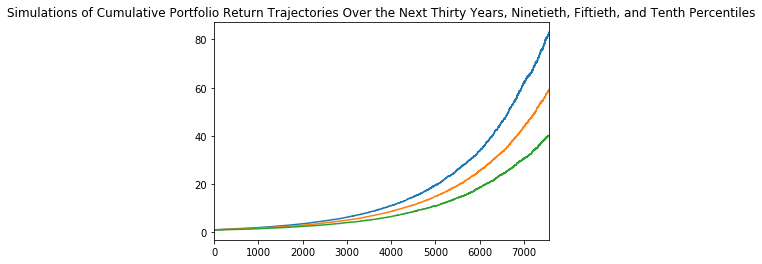

In [108]:
# Plot the cumulative returns over time
plot_title = f"Simulations of Cumulative Portfolio Return Trajectories Over the Next Thirty Years, Ninetieth, Fiftieth, and Tenth Percentiles"
#final_cumul_ret_90.plot(legend=None, title=plot_title)
result = portfol_cumul_ret.quantile([.9, .5, .1], axis=1).T #to flip things, set axis equal to one portfol_cumul_ret.quantile([.9, .5, .1], axis=1).T
result.plot(legend=None, title=plot_title)
result
#result.T.plot(legend=None, title=plot_title)
#result.plot(legend=None, title=plot_title)
# this section came from direct help from Tutor, Ms. LT

0.9           0.5            0.1
0     2.000000e+04  2.000000e+04   20000.000000
1     2.010127e+04  2.001385e+04   19923.733500
2     2.014959e+04  2.002250e+04   19901.490683
3     2.018999e+04  2.003885e+04   19890.047323
4     2.023212e+04  2.004441e+04   19884.918419
5     2.026065e+04  2.005523e+04   19862.845467
6     2.028359e+04  2.007445e+04   19860.899911
7     2.030108e+04  2.008463e+04   19850.316134
8     2.033695e+04  2.009187e+04   19848.104561
9     2.035808e+04  2.010349e+04   19831.857792
10    2.039528e+04  2.012112e+04   19838.501349
11    2.040705e+04  2.012717e+04   19838.763365
12    2.043786e+04  2.014432e+04   19832.606492
13    2.046586e+04  2.014282e+04   19839.113327
14    2.048204e+04  2.016431e+04   19835.633623
15    2.049980e+04  2.017078e+04   19838.520418
16    2.051398e+04  2.017501e+04   19822.530644
17    2.052841e+04  2.019495e+04   19830.201014
18    2.056348e+04  2.020557e+04   19830.929084
19    2.060856e+04  2.020789e+04   19850.174294
20    2.060932e+04  2.020624e+04   19864.768065
21    2.062230e+04  2.021391e+04   19864.645892
22    2.064081e+04  2.023023e+04   19869.085100
23    2.065497e+04  2.023299e+04   19858.403469
24    2.070382e+04  2.024566e+04   19871.890680
25    2.071630e+04  2.025708e+04   19852.048050
26    2.071874e+04  2.027629e+04   19843.958574
27    2.072426e+04  2.028095e+04   19820.284732
28    2.076430e+04  2.030050e+04   19856.258205
29    2.077183e+04  2.029931e+04   19855.275277
...            ...           ...            ...
7531  1.627462e+06  1.163288e+06  794992.279928
7532  1.625493e+06  1.161815e+06  795182.716229
7533  1.625313e+06  1.162253e+06  795934.148540
7534  1.631405e+06  1.164027e+06  796549.026130
7535  1.627400e+06  1.162798e+06  794380.998459
7536  1.630975e+06  1.165328e+06  793785.650738
7537  1.630604e+06  1.163278e+06  795227.614086
7538  1.633976e+06  1.162060e+06  796425.676430
7539  1.633923e+06  1.166774e+06  796990.324153
7540  1.638398e+06  1.169735e+06  794294.179113
7541  1.638430e+06  1.169828e+06  794417.763712
7542  1.634470e+06  1.170597e+06  796375.244472
7543  1.633991e+06  1.168420e+06  795080.534086
7544  1.631817e+06  1.170480e+06  795374.722288
7545  1.633801e+06  1.169967e+06  797716.358988
7546  1.638697e+06  1.169999e+06  798718.027834
7547  1.639285e+06  1.171797e+06  797102.375765
7548  1.636344e+06  1.171748e+06  800187.921819
7549  1.636767e+06  1.171742e+06  801540.888756
7550  1.639222e+06  1.171826e+06  797829.135317
7551  1.640763e+06  1.172427e+06  796941.038638
7552  1.645654e+06  1.171529e+06  795296.702409
7553  1.645701e+06  1.174866e+06  795615.457741
7554  1.648109e+06  1.175557e+06  796486.177447
7555  1.646938e+06  1.178213e+06  799258.795254
7556  1.646580e+06  1.175842e+06  801010.379177
7557  1.650807e+06  1.178311e+06  800592.827318
7558  1.647771e+06  1.177274e+06  801737.129244
7559  1.658727e+06  1.176478e+06  801765.800957
7560  1.659792e+06  1.178194e+06  803858.738170

[7561 rows x 3 columns]

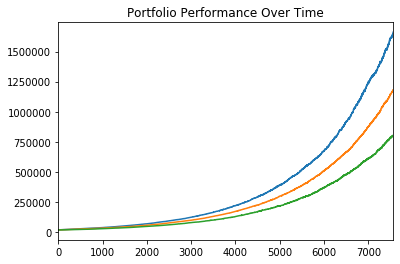

In [109]:
# Compute portfolio performance over time
plot_title = f"Portfolio Performance Over Time"
result = portfol_cumul_ret.quantile([.9, .5, .1], axis=1).T
portfolio_perf = plaid_initial * result
portfolio_perf.plot(legend=None, title=plot_title)
portfolio_perf
# Plot projected performance over time
# 0235 wed morning
# to do, make graphs, check numbers, download sql program
#plot_title = f"Simulations of Cumulative Portfolio Return Trajectories Over the Next Thirty Years, Ninetieth, Fiftieth, and Tenth Percentiles"
#final_cumul_ret_90.plot(legend=None, title=plot_title)
#result = portfol_cumul_ret.quantile([.9, .5, .1], axis=1).T #to flip things, set axis equal to one portfol_cumul_ret.quantile([.9, .5, .1], axis=1).T
#result.plot(legend=None, title=plot_title)
#result



# 0743 wed NEED TO DOUBLE CHECK W ALL THEIR FILES TO ANSWER QUESTIONS!!!!